# A2Q3

# Q1

In [1]:
# import packages needed for data processing, learning and plotting
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Prepare Data

In [8]:
# Create a data class such that it ranges from -2 to 2
data = np.array([[-2+0.2*i, -2+0.2*j] for i in range(21) for j in range(21)])
np.random.shuffle(data)
# Label data in -1 for result>1 and +1: result<=1
label = np.array([[1] if x[0]**2+x[1]**2 <= 1 else [-1] for x in data])

# split the data sets into 80% for training and 20% for  testing
sep = len(data)//5
train_data = data[:sep]
train_label = label[:sep]
test_data = data[sep:]
test_label = label[:sep]

## View the data distribution

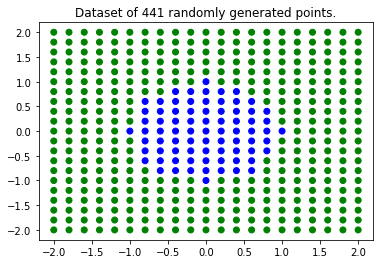

In [12]:
color = ['green' if each_label == -1 else 'blue' for each_label in label]
p = plt.scatter(data[:, 0], data[:, 1], c=color)
plt.title("Dataset of 441 randomly generated points.")
plt.show()

## Build Model

In [20]:
class RBFnn:
    def __init__(self, X, y, sigma):
        self.X = X
        self.y = y
        self.sigma = sigma
        self.centers = None
        self.w = None

    def square_distance(self, X1, X2):
        return np.dot((X1-X2).T, X1-X2)

    def fit_by_center(self): # method fit by a provided center
        self.centers = self.X
        self._fit()

    def fit_by_150_centers(self): # method fit by a random of 150 centers
        idx = np.random.randint(self.X.shape[0], size=150)
        self.centers = self.X[idx, :]
        self._fit()

    def fit_by_sklearn(self): # fit by using the sklearn library
        kmeans = KMeans(n_clusters=150).fit(self.X)
        self.centers = kmeans.cluster_centers_
        self._fit()
    
    def _fit(self):
        # apply rbf algorithm compute similarity between input vector and prototype vector.
        G = np.array([[(1 / np.exp(-self.square_distance(x, c)/(2*(self.sigma**2)))) for c in self.centers] for x in self.X])
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(G.T, G)), G.T), self.y)

    def predict(self, X):
        y_pred = np.dot(np.array([[(1 / np.exp(-self.square_distance(x, c) / (2 * (self.sigma ** 2)))) for c in self.centers] for x in X]), self.w)
        return y_pred

    def mse(self, y, y_pred):
        N = y.shape[0]
        return np.dot((y_pred-y).T, (y_pred-y))[0][0] / N
    
    def get_acc(self, y, y_pred):
        corr = 0
        for i in range(0, len(y)):
            corr += 1 if (y[i] == y_pred[i]) else 0
        return corr / len(y)

In [21]:
data = np.array([[-2+0.2*i, -2+0.2*j] for i in range(21) for j in range(21)])
label = np.array([[1] if x[0]**2+x[1]**2 <= 1 else [-1] for x in data])
idx = np.random.permutation(data.shape[0])
data = data[idx]
label = label[idx]
split_idx = int(441*0.8)
train_data = data[:split_idx]
train_label = label[:split_idx]
test_data = data[split_idx:]
test_label = label[split_idx:]

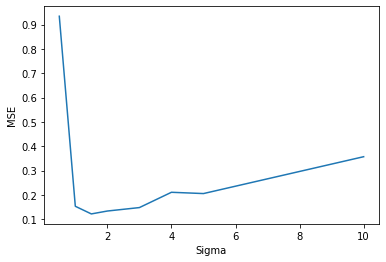

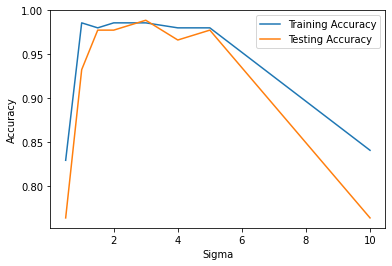

In [22]:
sigmas = [0.01, 0.1, 0.5, 1, 5, 10]
mses = []
test_accs = []
train_accs = []
for sigma in sigmas:
    net = RBFnn(X=train_data, y=train_label, sigma=sigma)
    net.fit_by_center()
    # prediction on data
    y_pred = net.predict(train_data)
    mses.append(net.mse(train_label, y_pred))
    # get final output with binary
    y_output = np.where(y_pred < 0, -1, 1)
    train_accs.append(net.get_acc(train_label, y_output))
    y_pred = net.predict(test_data)
    y_output = np.where(y_pred < 0, -1, 1)
    test_accs.append(net.get_acc(test_label, y_output))
plt.figure()
plt.plot(sigmas, mses)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(sigmas, train_accs)
plt.plot(sigmas, test_accs)
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [23]:
print(mses)
print(train_accs)
print(test_accs)

[0.9344199309415647, 0.15333804780284455, 0.12192691971751818, 0.13379639230382837, 0.14797287212664825, 0.2108426381987983, 0.20556954418078652, 0.3570808288927802]
[0.8295454545454546, 0.9857954545454546, 0.9801136363636364, 0.9857954545454546, 0.9857954545454546, 0.9801136363636364, 0.9801136363636364, 0.8409090909090909]
[0.7640449438202247, 0.9325842696629213, 0.9775280898876404, 0.9775280898876404, 0.9887640449438202, 0.9662921348314607, 0.9775280898876404, 0.7640449438202247]


We see that the accuracy increases very sharply as Sigma increases and approach 2, after which point, we see the accuracy deceases due to overfitting.

# Q2a

In [24]:
net = RBFnn(X=train_data, y=train_label, sigma=2)
net.fit_by_150_centers()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(train_label, y_output))
y_pred = net.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(test_label, y_output))

0.9801136363636364
0.9887640449438202


The accuracy is approximately 0.98876 with test set

# Q2b

In [25]:
net = RBFnn(X=train_data, y=train_label, sigma=2)
net.fit_by_sklearn()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(train_label, y_output))
y_pred = net.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(test_label, y_output))

0.9801136363636364
0.9887640449438202


The acuracy of the training with sklearn is 0.98876 with the test set.

# Reference
1. ECE657 Lecture slides Set3 
2. https://github.com/paulwong16/ECE657-Tools_of_Intelligent_Sys_Design/blob/master/a2/Q3.ipynb
3. https://github.com/rkarwayun/ECE657/blob/master/RBF%20NN/RBF_NN.ipynb